# Анализ данных о продажах компьютерных игр


### Оглавление
<ul>
    <li><a href="#Описание проекта">Описание проекта</a></li>
    <li><a href="#Шаг 1. Выгрузка данных">Шаг 1. Выгрузка данных</a></li>
    <li><a href="#Шаг 2. Предобработка данных">Шаг 2. Предобработка данных</a>
    <ul>
            <li><a href="#2.1 Замена названий столбцов">2.1 Замена названий столбцов</a></li>
            <li><a href="#2.2 Обработка пропущенных значений">2.2 Обработка пропущенных значений</a></li>
        <li><a href="#2.2 Замена типов данных">2.2 Замена типов данных</a></li>
        <li><a href="#2.3 Устранение дубликатов">2.3 Устранение дубликатов</a></li>
        <li><a href="#2.4 Расчет суммарных продаж по всем регионам">2.4 Расчет суммарных продаж по всем регионам</a></li>
        </ul>
    </li>
    <li><a href="#Шаг 3. Исследовательский анализ данных">Шаг 3. Исследовательский анализ данных</a></li>
    <ul>
            <li><a href="#3.1. Распределение игр по годам выпуска">3.1. Распределение игр по годам выпуска</a></li>
            <li><a href="#3.2. Распределение продаж по годам для популярных платформ">3.2. Распределение продаж по годам для популярных платформ</a></li>
        <li><a href="#3.4 Выбор потенциально прибыльных платформ">3.4 Выбор потенциально прибыльных платформ</a></li>
        <li><a href="#3.5 Диаграммы размаха продаж по платформам">3.5 Диаграммы размаха продаж по платформам</a></li>
        <li><a href="#3.6 Влияние оценок пользователей и критиков на продажи игр">3.6 Влияние оценок пользователей и критиков на продажи игр</a></li>
        <li><a href="#3.7 Распределение игр по жанрам">3.7 Распределение игр по жанрам</a></li>
    </ul>
    <li><a href="#Шаг 4. Портрет пользователя по регионам">Шаг 4. Портрет пользователя по регионам</a></li>
    <ul>
        <li><a href="#4.1 Рейтинг платформ по регионам ">4.1 Рейтинг платформ по регионам </a></li>
        <li><a href="#4.2 Рейтинг жанров по регионам ">4.2 Рейтинг жанров по регионам </a></li>
        <li><a href="#4.3 Влияние рейтинга ESRB на продажи ">4.3 Влияние рейтинга ESRB на продажи </a></li>
     </ul>   
       <li><a href="#Шаг 5. Проверка гипотез">Шаг 5. Проверка гипотез</a></li> 
    <ul>
        <li><a href="#5.1 Сравнение пользовательских рейтингов платформ Xbox One и PC">5.1 Сравнение пользовательских рейтингов платформ Xbox One и PC</a></li>
        <li><a href="#5.2 Сравнение пользовательских рейтингов жанров Action и Sports">5.2 Сравнение пользовательских рейтингов жанров Action и Sports</a></li>
     </ul>  
    <li><a href="#Общий вывод"> Общий вывод</a></li>
    
    
   
    
    
        
        
        
        
        
        
        
        
        
      
        
        
        
        
        
       
        
            

       


<a id="Описание проекта"></a>
### Описание проекта

В этом исследовании мы изучим исторические данные о продажах игр онлайн-магазина "Стримчик", а также об оценках пользователей и экспертов, жанрах и платформах, на которых эти игры доступны. Цель исследования - определить потенциально популярный продукт и на основе этого спланировать рекламные кампании на 2017 г. 

В нашем распоряжении - следующие данные, предоставленные за период до 2016 года включительно:

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.





<a id="Шаг 1. Выгрузка данных"></a>
### Шаг 1. Выгрузка данных

Импортируем библиотеки, необходимые для дальнейшей работы.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

Выгрузим файл с данными, которые будем использовать для анализа.

In [3]:
try: 
    df = pd.read_csv('/datasets/games.csv')
    
except:
    df = pd.read_csv('/Users/kristinabalcugova/Documents/games.csv')
    

Данные выгружены. Изучим их подробнее и проведем предобработку данных.

<a id="Шаг 2. Предобработка данных"></a>
### Шаг 2. Предобработка данных

Изучим данные.

In [4]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Всего имеем данные по 16715 наименованиям игр, однако для некоторых из них нет полной информации. Изучим подробнее каждый столбец.

In [5]:
#изучим столбец Name - он содержит названия игр

df['Name'].describe()

count                           16713
unique                          11559
top       Need for Speed: Most Wanted
freq                               12
Name: Name, dtype: object

Всего значений в этом столбце - 16713, т.е. в двух строках из датасета не указано название игры. 
При этому уникальных наименований - 11559. Вероятно, это связано с тем, что игры выпускаются на различных платформах - и для каждой версии выделена отдельная строка. Тем не менее, необходимо будет проверить датасет на наличие дублирующих друг друга строк.

Наиболее часто встречается игра *Need for Speed: Most Wanted* - 12 упоминаний.

Формат данных - object, т.е. строковые значения.

In [6]:
#изучим столбец Platform - он содержит названия платформ

df['Platform'].describe()

count     16715
unique       31
top         PS2
freq       2161
Name: Platform, dtype: object

Пропущенных значений в столбце *Platform* нет. Тип данных - object, т.е. строковые значения.
Уникальных значений - 31, самая часто встречающаяся платформа - PS2 (2161 упоминание).

Ниже приведем список всех наименований платформ, встречающихся в датасете:

In [7]:
df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [8]:
#изучим столбец Year_of_Release - год выхода игры

df['Year_of_Release'].describe()

count    16446.000000
mean      2006.484616
std          5.877050
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: Year_of_Release, dtype: float64

Год выхода указан для 16446 игр из списка, то есть столбец содержит 269 пропусков. 
В датасете представлены игры, выпущенные с 1980 по 2016 гг. 
Формат данных - float64, далее можно привести к целочисленным значениям.

In [9]:
#изучим столбец Genre - год выхода игры

df['Genre'].describe()

count      16713
unique        12
top       Action
freq        3369
Name: Genre, dtype: object

Жанр указан для 16713 игр из датасета -  в двух строках это значение пропущено.
Ниже приведем список всех наименований жанров, встречающихся в датасете:

In [10]:
df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

В столбцах с данными по продажам в Северной Америке, Европе, Японии и других регионах (NA_sales, EU_sales, JP_sales, Other_sales)цифры предоставлены для каждой игры, тип данных - float64. Более подробный анализ данных по продажам проведем на следующих этапах.

In [11]:
#изучим столбец Critic_Score - оценка критиков:

df['Critic_Score'].describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: Critic_Score, dtype: float64

Оценки от критиков выставляются по 100-балльной шкале. Для игр, попавших в выборку, минимальня оценка - 13, максимальная - 98. Оценки выражены целыми значениями, значит, формат float64 можно будет привести к целочисленным значениям.
При этом данные об оценке критиков предоставлены лишь для 8137 игр, то есть менее чем для половины выборки. 


In [12]:
#изучим столбец User_Score - оценка пользователей:

df['User_Score'].describe()

count     10014
unique       96
top         tbd
freq       2424
Name: User_Score, dtype: object

In [13]:
df['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Столбец с оценками пользователей, помимо числовых значений (оценки выражены целым числом или десятичной дробью с одним знаком после запятой) в промежутке от 0 до 10, содержит также пропущенные значения (значение пользовательской оценки указано лишь для 10014 наименований, то есть этот столбец содержит пропуски в 6701 строке) и строкове значение "tbd", которое является и самым часто встречающимся значением в этом столбце.

Аббревиатура "tbd", вероятно, означает "to be determined". То есть для данных игр значение пользовательской оценки еще не определено - в таком случае, эти значения можно будет заменить на NaN. Остальные значения можно привести к формату float.  

In [14]:
#изучим столбец Rating - рейтинг от организации ESRB :

display(df['Rating'].describe())
df['Rating'].unique()

count     9949
unique       8
top          E
freq      3990
Name: Rating, dtype: object

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Возрастной рейтинг указан лишь для 9949 игр в датасете, то есть столбец содержит 6766 пропусков. Тип данных - object, т.е. строковые значения/ значения NaN (пропущенные значения).

Рейтинг выражен буквенными обозначениями. Расшифруем их, опираясь на данные, предоставленные на сайте ESRB (https://www.esrb.org/ratings-guide/):

- *E* - без возрастных ограничений
- *M* - для лиц в возрасте 17 лет и старше 
- *T* - для лиц в возрасте 13 лет и старше 
- *E10+* - для лиц в возрасте 10 лет и старше 
- *K-A* - более ранняя версия (использовалась до 1998 года) рейтинга *E*, то есть без возрастных ограничений
- *AO* - для лиц в возрасте 18 лет и старше 
- *EC* - для детей в возрасте 3 лет и старше 
- *RP* - "rating pending", рейтинг игре еще не присвоен




В рамках подготовки данных к дальнейшему анализу осуществим следующие операции:

- заменим названия столбцов, приведя их к нижнему регистру;
- Преобразуйте данные в столбцах: Year_of_Release (приведем к целочисленным значениям), Critic_Score (приведем к целочисленным значениям), User_Score (заменим "tbd" на NaN и остальные значения приведем к float).
- По возможности обработаем пропуски (пропущенные значения содержатся в столбцах Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating);

Также рассчитаем и добавим в датасет дополнительный показатель - суммарные продажи во всех регионах для каджой игры.


<a id="2.1 Замена названий столбцов"></a>
#### 2.1 Замена названий столбцов

Заменим наименования всех столбцов, приведя их к нижнему регистру.


In [15]:
for name in df.columns:
    df.rename(columns={name:name.lower()},inplace=True)
    
df.columns    
    

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<a id="2.2 Обработка пропущенных значений"></a>
#### 2.2 Обработка пропущенных значений

Пропущенные значения содержатся в следующих столбцах: Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating.

Количество пропущенных значений в name и genre совпадает - проверим, не относятся ли они к одним и тем же строкам.

In [16]:
df.loc[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Действительно, для строк с индексами 659 и 14244 не указаны ни названия игр, ни жанр. Так же нет данных об оценке критиков и пользователей, а также о присвоенном им возрастном рейтинге. Вероятно, эти пропуски вызваны ошибкой при создании базы данных. 
Пропуски в столбце year_of_release могут быть обоснованы влиянием человеческого фактора: возможно, год выпуска не был внесен в базу данных для некоторых игр.

При этом в столбцах Name, Year_of_Release, Genre количество пропусков небольшое. Рассчитаем долю строк, для которых эти значения пропущены, а также долю продаж, которая на них приходится. Если они незначительны, удалим эти пропуски. 

In [17]:
print('Доля строк, для которых пропущенны значения в столбцах name, year_of_release и genre, от общего объема датасета',
     np.ceil(len(df.loc[(df['name'].isna())|(df['year_of_release'].isna())|(df['genre'].isna())])/len(df)*100),'%')

Доля строк, для которых пропущенны значения в столбцах name, year_of_release и genre, от общего объема датасета 2.0 %


In [18]:
print('Доля продаж, которые приходятся на строки с пропусками, от общего объема:',
      np.ceil(df.query('name.isna() | year_of_release.isna() | genre.isna()')[['na_sales',
                                                                 'eu_sales',
                                                                 'jp_sales',
                                                                 'other_sales']].sum().sum()/df[['na_sales',
                                                                 'eu_sales',
                                                                 'jp_sales',
                                                                 'other_sales']].sum().sum() *100),
      '%')




Доля продаж, которые приходятся на строки с пропусками, от общего объема: 2.0 %


In [19]:
#удалим пропуски в столбцах name, year_of_release, genre:

df = df.dropna (subset=['name', 'year_of_release', 'genre'])
df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Пропуски в столбце rating заменим строковыми значениями: если значение пропущено, вероятно, рейтинг игре не был присвоен. В таком случае заменим пропуск на значение "без рейтинга".

In [20]:
df['rating'] = df['rating'].fillna('без рейтинга')

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Отличное решение для столбца, который содержит категориальные данные, поможет определить ключевое различие в потрете пользователя
        
        df['rating'] = df['rating'].fillna('без рейтинга')
        
Можно посмотреть на частотность использования категорий рейтинга, по отношению к остальным
        
        EC         8
        K-A        3
        RP         1
        AO         1

In [28]:
print('Частотность использования категорий рейтинга')
pd.pivot_table(df, index='rating', values='name', aggfunc='nunique').sort_values(by='name',ascending=False)

Частотность использования категорий рейтинга


,name
rating,
без рейтинга,5776
E,2627
T,1880
M,865
E10+,788
EC,5
K-A,3
AO,1
RP,1


Количество пропущенных значений в столбцах critic_score и user_score достаточно велико. Можем предположить, что эти игры недостаточно популярны для того, чтобы получить однозначную оценку от критиков и пользователей. Вероятность влияния технической ошибки или человеческого фактора на возникновение пропусков в этих столбцах также не стоит отрицать.

Мы не можем подобрать замену для этих пропусков, которая бы не исказила результаты исследования, поэтому их обрабатывать мы не будем. 

<a id="2.2 Замена типов данных"></a>
#### 2.2 Замена типов данных

In [23]:
# приведем значения в столбца year_of_release  к целым числам:


df['year_of_release'] = df['year_of_release'].astype('int32')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           16444 non-null  object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.3+ MB


Т.к. столбец critic_score содержат большое количество пропусков (т.е. данных формата 'float'), которые мы решили не обрабатывать (см. предыдущий шаг), заменить тип данных на 'int' не получится.

Cтолбец user_score содержит строкове значение "tbd"("to be determined"), которое, по сути, можно приравнять к значению NaN. Заменим эти значения.

In [24]:
df.loc[df['user_score'] == "tbd", 'user_score'] = np.nan

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
Верно, по своей сути tbd и является Nan. Отлично, что определяешь неявные пропущенные значения.

In [25]:
#проверим, произошла ли замена:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

Теперь заменим тип данных в этом столбце на 'float32'.

In [26]:
df['user_score'] = df['user_score'].astype('float32')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float32
 10  rating           16444 non-null  object 
dtypes: float32(1), float64(5), int32(1), object(4)
memory usage: 1.3+ MB


<a id="2.3 Устранение дубликатов"></a>
#### 2.3 Устранение дубликатов

Проверим датасет на наличие явных дубликатов.

In [28]:
df.duplicated().sum()

0

Явных дубликатов в датасете нет. Проверим, не содержит ли он неявные дубликаты - таковыми будем считать строки, в которых название, жанр, год релиза и платформа совпадают.

In [29]:
df.loc[df.duplicated(['name','genre','year_of_release','platform'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15969,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E


Обнаружили один такой дубликат. Посмотрим, чем отличаются эти строки друг от друга.

In [30]:
df.loc[(df['name']=='Madden NFL 13') & (df['platform']=='PS3') & (df['year_of_release']==2012) &
      (df['genre'] == 'Sports') ]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
600,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
15969,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Отличаются данные о продажах: в строке 15969 продажи почти во всех регионах равны нулю. При этом оценки критиков и пользователей, а также возрастной рейтинг совпадают. Вероятно, возникновение этого дубликато связано с  ошибкой при внесении данных о суммах продаж в базу данных. Удалим дублирующую строку.

In [31]:
df = df.drop(index=15969)


In [32]:
df.reset_index(drop= True , inplace= True )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int32  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float32
 10  rating           16443 non-null  object 
dtypes: float32(1), float64(5), int32(1), object(4)
memory usage: 1.3+ MB


<a id="2.4 Расчет суммарных продаж по всем регионам"></a>
#### 2.4 Расчет суммарных продаж по всем регионам

In [29]:
df['total_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int32  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float32
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: float32(1), float64(6), int32(1), object(4)
memory usage: 1.4+ MB


In [35]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,без рейтинга,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,без рейтинга,31.38


Мы изучили данные, в том числе более подробно рассмотрели каждый столбец, его значения и тип данных. 
В рамках предобработки данных мы заменили наименования столбцов в исходном датасете, приведя их к нижнему регистру.

Мы избавились от пропусков в столбцах *name*, *genre* и *year_of_release*, при этом размер датасета сократился на 2%. Пропуски в столбце *rating* заменили на значение "без рейтинга". При этом мы решили оставить строки, для которых пропущены значения в столбцах critic_score и user_score - это довольно большой объем данных, а подобрать адекватную замену пропущенным значениям мы не можем. 

Значения в столбце *year_of_release* привели к типу данных 'int' (целые числа).

В столбце *user_score* строковые обозначения 'tbd' привели к типу значений nan, и весь столбец привели к типу данных 'float32'.

В датасете был обнаружен неявный дубликат, от которого мы избавились.

Наконец, мы добавили столбец с рассчетным значением общих суммам продаж по всем регионам для каждой игры.

Данные готовы для анализа.

<a id="Шаг 3. Исследовательский анализ данных"></a>
### Шаг 3. Исследовательский анализ данных

Проведем исследовательский анализ данных:

- изучим распределение игр по годам выпуска;
- изучим распределение продаж по годам для платформ с наибольшими суммарными продажами; 
- определим актуальный период, на данные которого будем опираться в дальнейшем; 
- определим потенциально прибыльные платформы; 
- изучим распределение глобальных продаж в разбивке по платформам;
- исследуюем влияние отзывов критиков и пользователей на продажи игр на разных платформах;
- изучим распределение игр по жанрам, определим жанры с высокими и низкими продажами.


<a id="3.1. Распределение игр по годам выпуска"></a>
#### 3.1. Распределение игр по годам выпуска

Посмотрим, сколько игр выпускалось в разные годы, и попробуем определить период, актуальный для дальнейшего исследования.

In [36]:
#создадим сводную таблицу для подсчета количества выпущенных игр по годам
pd.pivot_table(df, values = 'name', 
               index='year_of_release', 
               aggfunc ='count').sort_values(by='year_of_release')


,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


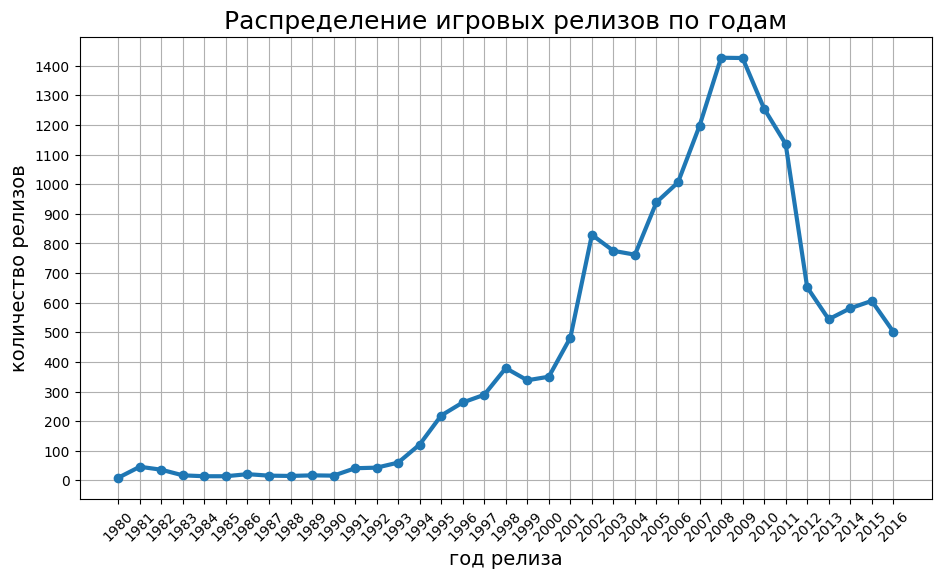

In [37]:
#построим график распределения количества релизов по годам

plt.figure(figsize=(11,6))
plt.title('Распределение игровых релизов по годам',fontsize=18)
plt.xticks(rotation = 45)
plt.yticks(np.arange(0,1500,100))
plt.xlabel('год релиза',fontsize=14)
plt.ylabel('количество релизов', fontsize=14)
plt.grid(True)
plt.plot(pd.pivot_table(df, values = 'name', 
               index='year_of_release', 
               aggfunc ='count').sort_values(by='year_of_release').index.astype('str'),
         pd.pivot_table(df, values = 'name', 
               index='year_of_release', 
               aggfunc ='count').sort_values(by='year_of_release')['name'],
         linewidth=3.0, marker='o')
plt.show()


Можно выделить несколько временных отрезков, отображенных на графике:

- с 1980 по 1993 гг. - выпускаются очень мало новых игр, их количество не превышает 100 релизов в год;
- с 1993 по 1998 гг. - количество новых релизов ежегодно растет, достигая пика в 400 новых игр в 1998 г.;
- с 1998 по 2000 гг. - небольшой спад в количестве релизов с минимальной отметой в 350 игр в год в 1999 г.;
- с 2000 по 2002 гг. - резкий подъем, количество релизов ежегодно стремительно растет, достигая пикового значения ок. 850 шт. в 2002 г.;
- с 2002 по 2004 гг. - снова небольшой спад до значения ок. 750 шт. в 2004 г.;
- с 2004 по 2009 гг. - стабильный рост, количество новых игр, выпускаемых ежегодно, увеличивается до отметки свыше 1400. Это максимальное значение, представленное на графике, которое сохраняется в 2008 и 2009 гг.;
- с 2009 по 2013 гг. - количество релизов постепенно снижается и к 2013 г. сокращается до 550 игр в год;
- с 2013 по 2016 гг. - снова наблиюдаем рост, к 2015 г. выпускается 600 новых игр в год. График показывает снижение количества релизов в 2016 г. по сравнению с предыдущим периодом (до 500 игр в год), однако стоит учесть, что в датасете представлены неполные данные за 2016 г. 


Возможно, по итогам полного 2016 г. тенденция к росту сохранится - в таком случае, за актуальный период можно брать 2013-2016 гг.



<a id="3.2. Распределение продаж по годам для популярных платформ"></a>
#### 3.2. Распределение продаж по годам для популярных платформ

Для начала выберем платформы с наибольшими суммарными продажами, для которых будем строить распределение продаж по годам.

In [38]:
#изучим сводную таблицу с общими суммами продаж по каждой платформе
display(pd.pivot_table(df, values='total_sales', index='platform', 
               aggfunc='sum').sort_values(by='total_sales',ascending=False))


,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.33
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


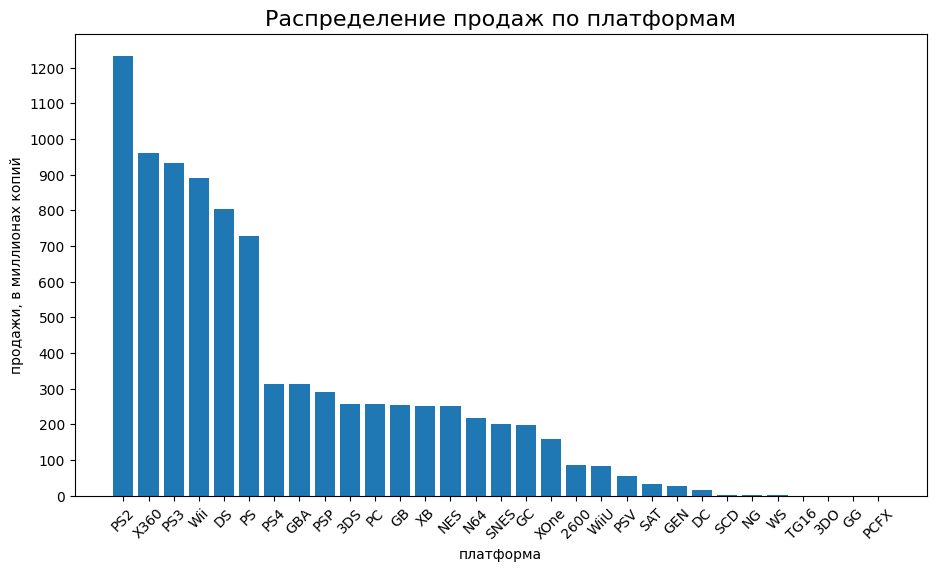

In [39]:
#построим график распределения продаж по платформам

plt.figure(figsize=(11,6))
plt.title('Распределение продаж по платформам',fontsize=16)
plt.xticks(rotation = 45)
plt.yticks(np.arange(0,1300, 100))
plt.xlabel('платформа',fontsize=10)
plt.ylabel('продажи, в миллионах копий', fontsize=10)

plt.bar(pd.pivot_table(df, values='total_sales', index='platform', 
               aggfunc='sum').sort_values(by='total_sales',ascending=False).index,
         pd.pivot_table(df, values='total_sales', index='platform', 
               aggfunc='sum').sort_values(by='total_sales',ascending=False)['total_sales'])            
plt.show()

Видим, что объемы продаж шести платформ (PS2, X360, PS3, Wii, DS, PS) значительно отличаются в бОльшую сторону от показателей остальных платформ - если копий игр, выпущенных для остальных платформ, было продано за весь период не более 300 миллионов, то для вышеперечисленных 6-ти лидеров списка это значение больше минимум в 2 раза. Максимальное количество копий было продано для PS2 - 1233 миллионов за весь период. 

Распределение продаж по годам будем строить для выбранных 6ти платформ.

In [40]:
#создадим сводную таблицу с распределением суммарных объемов продаж для каждой из популярных платформ по годам
top_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
pd.pivot_table(df.query('platform in @top_platforms'), index = 'year_of_release',
               columns='platform', values='total_sales', aggfunc='sum').sort_values(by='year_of_release')


platform,DS,PS,PS2,PS3,Wii,X360
year_of_release,,,,,,
1985,0.02,NaN,NaN,NaN,NaN,NaN
1994,NaN,6.03,NaN,NaN,NaN,NaN
1995,NaN,35.96,NaN,NaN,NaN,NaN
1996,NaN,94.70,NaN,NaN,NaN,NaN
1997,NaN,136.17,NaN,NaN,NaN,NaN
1998,NaN,169.49,NaN,NaN,NaN,NaN
1999,NaN,144.53,NaN,NaN,NaN,NaN
2000,NaN,96.37,39.17,NaN,NaN,NaN
2001,NaN,35.59,166.43,NaN,NaN,NaN


Видим, что продажи игр для выбранных платформ начались не ранее 1994 года. Исключение составляет незначительная цифра, относящаяся к продажам копий для платформы DS в 1985 году. При этом , судя по сводной таблице, реальные продажи игр для этой платформы начались лишь в 2004 году. Обратим на это внимание.

In [41]:
#изучим список игр, которые были выпущены для платформы DS до 2004 года
df.query('platform =="DS" & year_of_release <2004 ')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15704,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,без рейтинга,0.02


В датасете содержится лишь одна запись об игре, выпущенной для платформы DS до 2004 года - в 1985 г. При этом продажи были только в Японии, и в незначительном количестве.

Игровая платформа DS, или Nintendo DS, была выпущена в 2004 году (https://simple.wikipedia.org/wiki/Nintendo_DS). Можем сделать вывод, что данная строка попала в датасет по ошибке - удалим ее.

In [42]:
df = df.drop(index=15704)
df.reset_index(drop=True, inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16442 entries, 0 to 16441
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16442 non-null  object 
 1   platform         16442 non-null  object 
 2   year_of_release  16442 non-null  int32  
 3   genre            16442 non-null  object 
 4   na_sales         16442 non-null  float64
 5   eu_sales         16442 non-null  float64
 6   jp_sales         16442 non-null  float64
 7   other_sales      16442 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float32
 10  rating           16442 non-null  object 
 11  total_sales      16442 non-null  float64
dtypes: float32(1), float64(6), int32(1), object(4)
memory usage: 1.4+ MB


<function matplotlib.pyplot.show(close=None, block=None)>

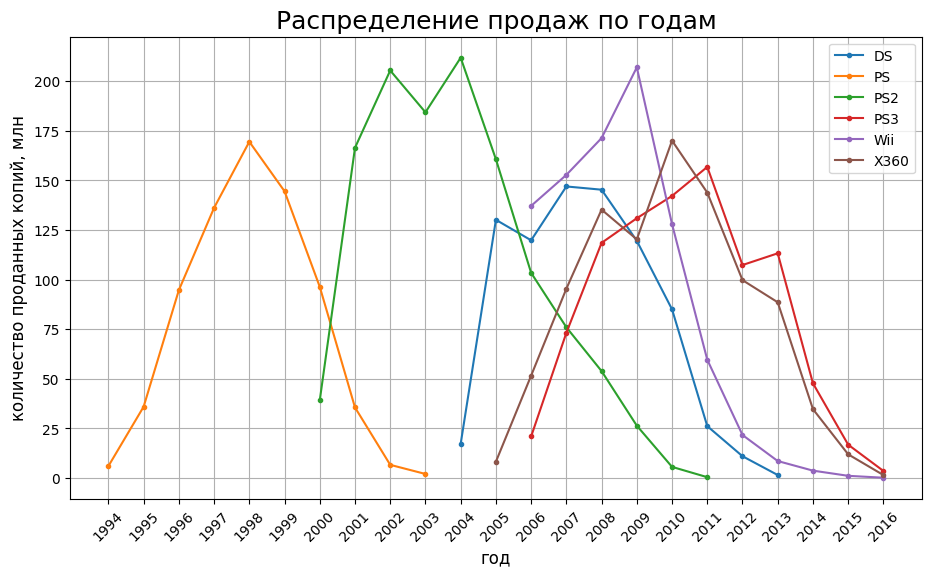

In [43]:
#построим график распределения продаж по годам для выбранных платформ
plt.figure(figsize=(11,6))
plt.title('Распределение продаж по годам',fontsize=18)
plt.yticks(np.arange(0,250,25))
plt.xticks(np.arange(1994,2017,1),rotation=45)
plt.xlabel('год',fontsize=12)
plt.ylabel('количество проданных копий, млн', fontsize=12)
plt.grid(True)

plt.plot(pd.pivot_table(df.query('platform in @top_platforms'), index = 'year_of_release',
               columns='platform', values='total_sales', aggfunc='sum').sort_values(by='year_of_release'),
        marker='.')
plt.legend(pd.pivot_table(df.query('platform in @top_platforms'), index = 'year_of_release',
               columns='platform', values='total_sales', aggfunc='sum').sort_values(by='year_of_release').columns)
plt.show

Опираясь на графики, можем сказать, что каждая из выбранных платформ "пережила" схожие друг с другом циклы: от старта продаж до пиковых значений, после которых следовал спад. Опишем подробнее каждый из графиков:

- Платформа PS попала на рынок раньше всех остальных: продажи игр для этой платформы начались в 1994 году с небольших объемов. Пик продаж (ок. 175 миллионов копий в год) пришелся на 1998 год, после чего наблюдался постепенный спад вплоть до прекращения продаж в 2003 году. Таким образом, период актуальности платформы составил 9 лет, пик продаж был достигнут через 5 лет после их начала;

- Первые игры для PS2 (вероятно, заменившей в итоге PS) появились в 2000 году, причем количество проданных копий в первый же год составляло уже ок. 30 миллионов. Рост объемов продаж был достаточно резким, и на 2002 - 2004 гг. пришлись пиковые значения - свыше 200 миллионов проданных копий. Это максимальные значения годовых объемов продаж среди всех рассматриваемых платформ. Далее следовал постепенный спад, завершившийся прекращением продаж в 2011 году. Срок "жизнедеятельности" платформы составил 11 лет, пик продаж пришелся на 2-4й год сущесвтования;

- В 2004 году стали продаваться первые игры для платформы DS - в этом году объем продаж составил ок. 15 миллионов копий. На графике этой платформы видим два пика: в 2005 (ок 130 млн)  и 2007-2008 гг.(ок.150 млн), после чего продажи пошли на спад. Последний год продаж - 2013. Максимальные значения объемов годовых продаж игр для этой платформы меньше всех остальных. Платформа была актуальна на протяжении 11 лет, пик продаж пришелся на 4 год существования;

- Платформа X360 (одна из трех, "доживших" до 2016 года) появилась в 2005 году. На ее графике также наблюдается два пика - в 2008 (ок. 130 млн) и 2010 (ок. 170 млн). Однако к 2016 году продажи упали почти до нуля - можно предположить, что это последний год существования платформы, и , в таком случае, срок ее актуальности составит 11 лет, пик продаж пришелся на 5й год существования;

- В 2006 году появились еще две плафтормы, игры для которых все еще выпускались в 2016 году. Продажи для первой из них, Wii, стартанули с внушительного значения почти в 140 млн. проданных копий, и достаточно быстро (к 2009 г.) достигли максимума - свыше 200 миллионов. После чего начался спад, также относительно резкий. К 2016 году игры для этой платформы практически перестали продаваться, срок актуальности - 10 лет, пик продаж пришелся на 3й год существования;

- Вторая платформа, появившаяся в 2006 г. - PS3, пришедшая на смену теряющей актуальность PS2. Максимальный объем продаж игр для нее был меньше, чем у двух предыдущих версий - ок. 160 миллионов копий, проданных в 2011 году. Небольшой пик на фоне общего спада пришелся на 2013 год (ок. 115 миллионов), однако к 2016 году для этой платформы также почти не продаются игры. Срок актуальности - 10 лет, пик продаж пришелся на 5й год существования;

Таким образом, игровые платформы актуальны в среднем на протяжении 10 лет. К 2016 году  из 6ти выбранных нами платформ с максимальными значениями объемов продаж за весь период лишь три продолжали существование, но и они уже не пользуются популярностью.

Пиковых значений объемы продаж игр для разных платформ достигают примерно через 4-5 лет после их появления. Соответственно, потенциально более прибыльными в 2017 году будут игры, выпущенные для платформ, появившихся ориентировочно в 2012-2013 гг.

На основании выводов из шагов 3.2 и 3.3 будем считать актуальным периодом 2013-2016 гг. Создадим новый датасет, в который войдут только данные за этот период, и далее будем использовать его.

In [44]:
df_new = df.query('year_of_release >= 2013')
df_new.reset_index(drop=True, inplace=True)
df_new.info()
display(df_new.head())
print('Доля данных, относящихся к актуальному периоду, от общего датасета составила',np.ceil(len(df_new)/len(df)*100),'%')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2233 entries, 0 to 2232
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int32  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    float64
 9   user_score       1192 non-null   float32
 10  rating           2233 non-null   object 
 11  total_sales      2233 non-null   float64
dtypes: float32(1), float64(6), int32(1), object(4)
memory usage: 192.0+ KB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,без рейтинга,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,без рейтинга,14.60
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


Доля данных, относящихся к актуальному периоду, от общего датасета составила 14.0 %


<a id="3.4 Выбор потенциально прибыльных платформ"></a>
#### 3.4 Выбор потенциально прибыльных платформ

Взглянем на объемы продаж по платформам за актуальный период.

In [45]:
#изучим сводную таблицу с общими объемами продаж по каждой платформе за 4 года
pd.pivot_table(df_new, index = 'year_of_release',
               columns='platform', values='total_sales', aggfunc='sum')


platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


За исследуемый период продажи прекратились либо снизились до очень небольших значений для следующих платформ: DS (последние продажи в 2013г), PSP(последний продажи в 2015 году), Wii(продажи стремились к нулю в 2016 г.). Вероятно, период актуальности этих платформ подошел или вскоре подойдет к концу.

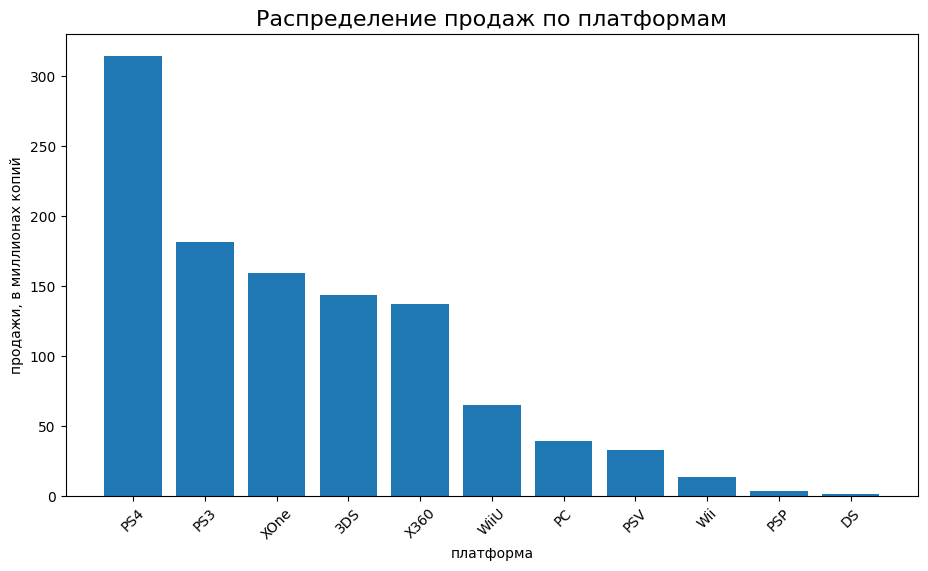

In [46]:
#построим график распределения продаж по платформам

plt.figure(figsize=(11,6))
plt.title('Распределение продаж по платформам',fontsize=16)
plt.xticks(rotation = 45)
plt.yticks(np.arange(0,350, 50))
plt.xlabel('платформа',fontsize=10)
plt.ylabel('продажи, в миллионах копий', fontsize=10)

plt.bar(pd.pivot_table(df_new, values='total_sales', index='platform', 
               aggfunc='sum').sort_values(by='total_sales',ascending=False).index,
         pd.pivot_table(df_new, values='total_sales', index='platform', 
               aggfunc='sum').sort_values(by='total_sales',ascending=False)['total_sales'])            
plt.show()

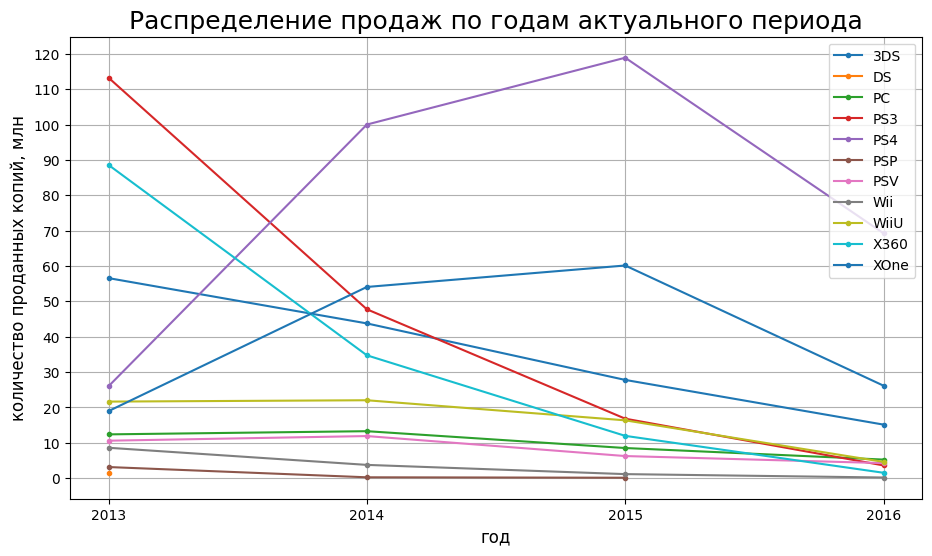

In [47]:
#построим графики объемов продаж для выбранных платформ по годам 

plt.figure(figsize=(11,6))
plt.title('Распределение продаж по годам актуального периода',fontsize=18)
plt.yticks(np.arange(0,150,10))
plt.xticks(np.arange(2013,2017,1))
plt.xlabel('год',fontsize=12)
plt.ylabel('количество проданных копий, млн', fontsize=12)
plt.grid(True)

plt.plot (pd.pivot_table(df_new, index = 'year_of_release',
               columns='platform', values='total_sales', aggfunc='sum'),  marker='.')

plt.legend(pd.pivot_table(df_new, index = 'year_of_release',
               columns='platform', values='total_sales', aggfunc='sum').sort_values(by='year_of_release').columns)

Как и было предположено выше, платформы DS, PSP и Wii перестали быть актуальными на 2016 г., и ориентироваться на них при составлении маркетингового плана на 2017 г. не стоит.

В 2015 г. свыше 10 миллионов копий новых игр было продано для следующих платформ: X360, WiiU, PS3, XOne, 3DS и PS4. Максимальное значение, значительно превышающее показатели остальных платформ - у PS4 (почти 120 миллионов проданных копий в 2015 г.), на втором месте - XOne (60 миллионов копий). Для 3DS в том же году было продано ок. 28 миллионов копий, для X360, WiiU и PS3 - от 10 до 20 млн. Однако стоит принять во внимание, что срок актуальности платформ X360 (11 лет с момента появления на рынке в 2016. г.) и PS3 (10 лет с момента появления на рынке), вероятно, подошел к концу. Маловероятно, что они сохранят уровень продаж в 2017 году.

К 2016 году графики всех платформ идут на спад, но если учесть, что за этот год данные представлены не полностью, есть вероятность того, что продажи продолжат расти либо останутся на уровне 2015 года для следующих платформ: PS4, XOne. 

Также обратим внимание на PC (персональный компьютер): игры для ПК продаются в меньших объемах, однако это платформа, стабильно существующая на рынке уже достаточно давно. Навряд ли компьютеры потеряют свою актуальность в качестве игровой платформы в ближайшие годы.

Таким образом, можем предположить, что в 2017 г. свою актуальность сохранят платформы WiiU, XOne, 3DS, PS4 и PC. Особое внимание стоит обратить на платформы PS4 и XOne, которые, помимо бОльших объемов продаж в последние годы по сравнению с другими платформами, имеют потенциал к росту этих объемов и в 2017 г. 

<a id="3.5 Диаграммы размаха продаж по платформам"></a>
#### 3.5 Диаграммы размаха продаж по платформам

Построим диаграммы размаха на основе данные по объемам продаж игр для выбранных в качестве потенциально прибыльных платформ (WiiU, XOne, 3DS, PS4 и PC).

In [48]:
#создадим список с потенциально прибыльными платформами
top_platforms_new = ['WiiU', 'XOne', '3DS', 'PS4','PC']

In [49]:
#изучим характеристика данных об оъемах продаж для выбранных платформ
pd.pivot_table(df_new.query('platform in @top_platforms_new'), 
               index = 'name', columns='platform', 
               values='total_sales', aggfunc='sum').describe()



platform,3DS,PC,PS4,WiiU,XOne
count,303.000000,189.000000,392.000000,115.000000,247.000000
mean,0.472772,0.208624,0.801378,0.562000,0.645020
std,1.381347,0.352304,1.609456,1.038778,1.036139
min,0.010000,0.010000,0.010000,0.010000,0.010000
25%,0.040000,0.030000,0.060000,0.060000,0.060000
50%,0.090000,0.080000,0.200000,0.200000,0.220000
75%,0.280000,0.230000,0.730000,0.595000,0.685000
max,14.600000,3.050000,14.630000,7.090000,7.390000


<AxesSubplot:title={'center':'Диаграммы размаха объемов продаж по платформам за актуальный период'}, xlabel='Количество проданных копий, млн.', ylabel='Игровые платформы'>

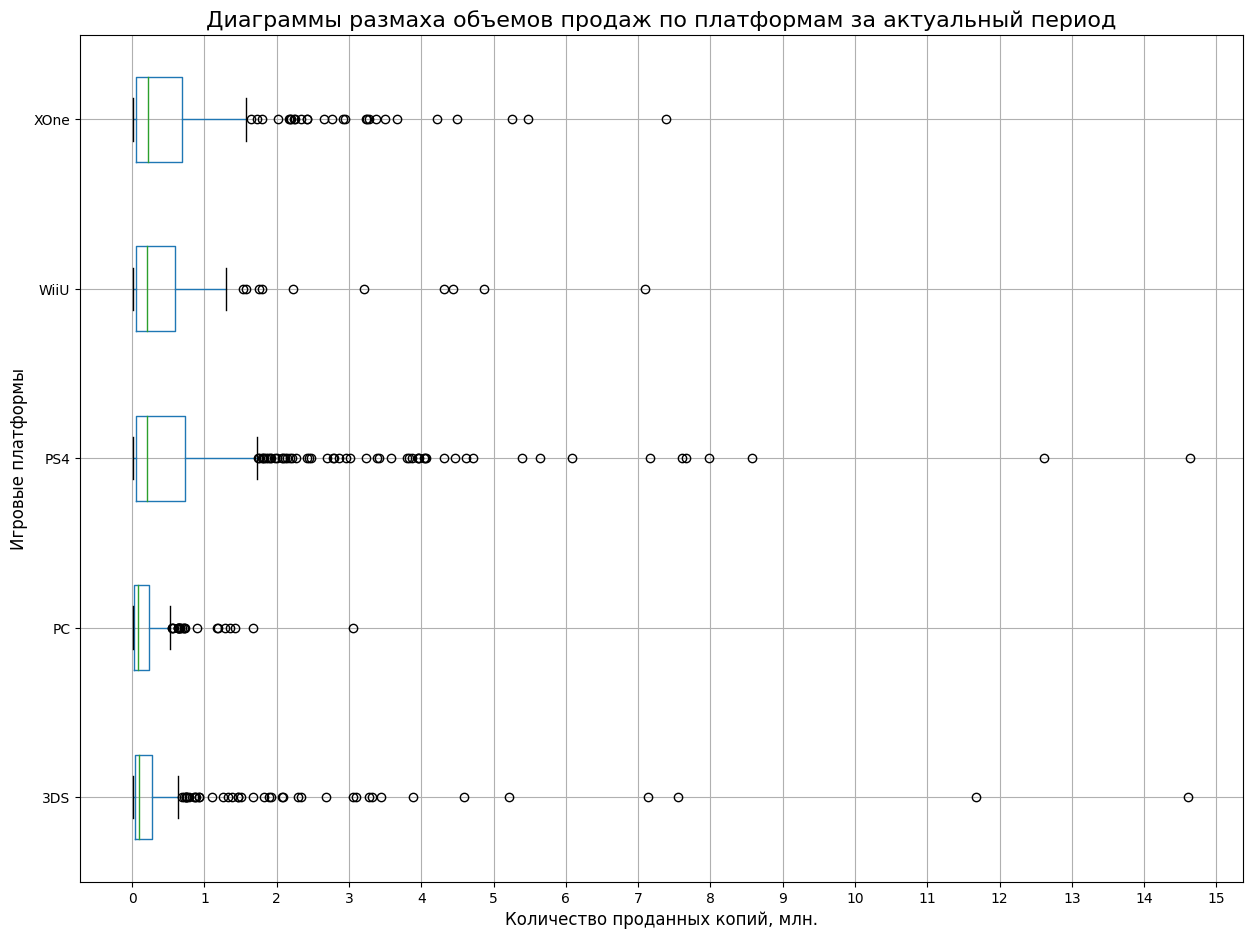

In [50]:
#построим диаграммы размаха
plt.figure(figsize=(15,11))
plt.title('Диаграммы размаха объемов продаж по платформам за актуальный период',fontsize=16)
plt.ylabel('Игровые платформы',fontsize=12)
plt.xticks(np.arange(0,22,1))
plt.xlabel('Количество проданных копий, млн.', fontsize=12)
pd.pivot_table(df_new.query('platform in @top_platforms_new'), index = 'name', columns='platform', values='total_sales', aggfunc='sum').boxplot(vert=False)

<AxesSubplot:title={'center':'Диаграммы размаха объемов продаж по платформам, до 2млн проданных копий'}, xlabel='Игровые платформы', ylabel='Количество проданных копий, млн'>

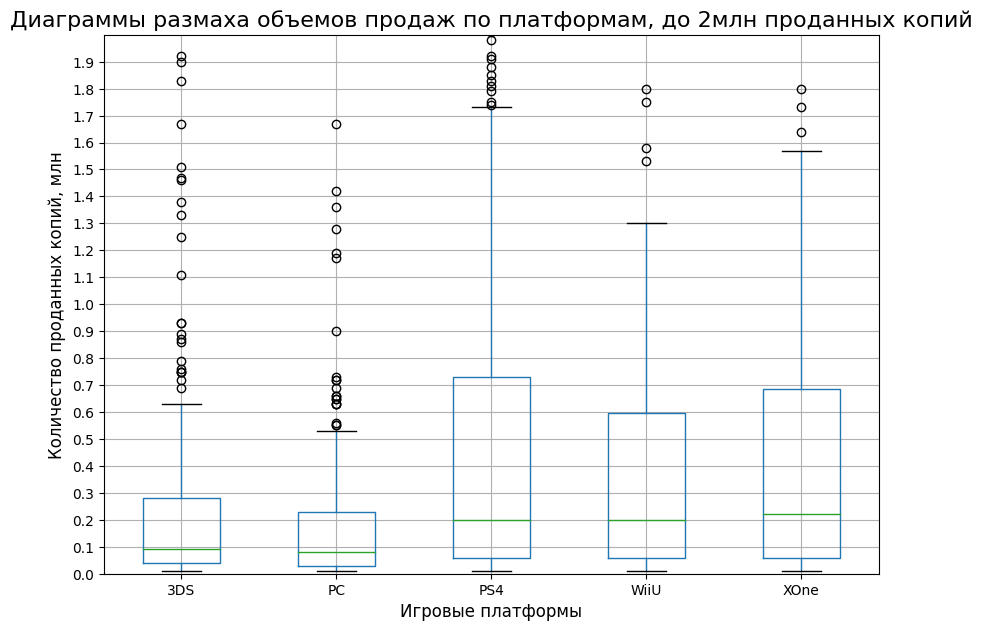

In [51]:
#построим диаграммы размаха на промежутке 0-2 млн. проданных копий 
plt.figure(figsize=(10,7))
plt.title('Диаграммы размаха объемов продаж по платформам, до 2млн проданных копий',fontsize=16)
plt.ylabel('Количество проданных копий, млн',fontsize=12)
plt.ylim(0,2)
plt.yticks(np.arange(0,2,0.1))
#plt.xticks(np.arange(0,22,1))
plt.xlabel('Игровые платформы', fontsize=12)
pd.pivot_table(df_new.query('platform in @top_platforms_new'), 
               index = 'name', columns='platform', values='total_sales', aggfunc='sum').boxplot()



Видим, что объемы продаж для большинства игр (75%) не превышают 1 млн. копий: так, 75% игр для PC продавались в объемах чуть свыше 0.2 млн. копий, 3DS - не более 0.3 млн. Лидеры - PS4 (свыше 0.7 млн. копий), XOne (почти 0.7 млн. копий), WiiU( 0.6 млн. копий).

Медианное значение колеблется от 0.08 млн. копий (PC) до 0.22 (XOne). Средние значения отличаются от медианных и находятся в промежутке от 0.2 млн. копий (PC) до 0.8 (платформа PS4). Очевидно, на средние значения оказывают влияние значения, не попадающие в границы статистически значимых выборок, которые мы видим на графике. Игр с такими показателями очень много для каждой из платформ - вероятно, это не выбросы, а игры-бестселлеры. Меньше всего таких суперпопулярных игр выпускалось для X360 и WiiU, больше всего - для PS4 и PS3. Игр, проданных в объемах до 5 млн. копий, довольно много. Превышающие эту цифру показатели - у единичных экземпляров. Самая успешная игра была выпущена для PS3 - объем продаж составил 21 млн. копий. Взглянем на эту игру.

In [52]:
df_new.query('platform=="PS3"').sort_values(by='total_sales',ascending=False).head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05


Действительно, это сверхпопулярная игра Grand Theft Auto V. Только в Европе объем продаж этой игры для PS3 составил почти 10 миллионов.

<a id="3.6 Влияние оценок пользователей и критиков на продажи игр"></a>
#### 3.6 Влияние оценок пользователей и критиков на продажи игр

Изучим корреляцию между оценками пользователей и оценками критиков и объемами продаж игр для платформы PS4 - в шаге 3.4 мы определили эту платформу как одну из самых популярных и потенциально прибыльных.

Коэффициент корреляции между оценками критиков и объемами продаж: 0.40656790206178095


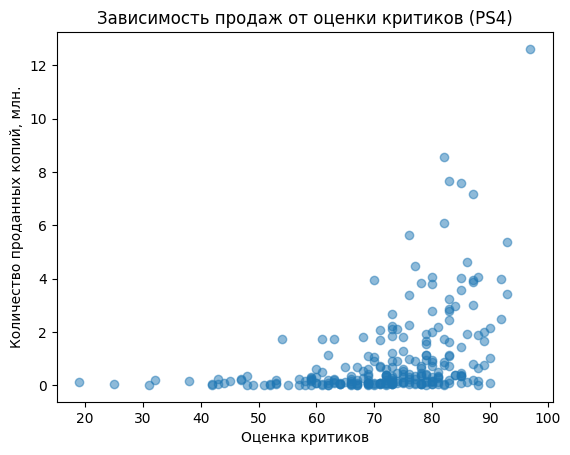

In [53]:
#построим диаграмму рассеяния и рассчитаем коэффициент корреляции между продажам и оценкой критиков
plt.title('Зависимость продаж от оценки критиков (PS4)')
plt.xlabel('Оценка критиков')
plt.ylabel('Количество проданных копий, млн.')
plt.scatter (df_new.query('platform == "PS4"')['critic_score'],
             df_new.query('platform == "PS4"')['total_sales'],
             alpha=0.5) 
print('Коэффициент корреляции между оценками критиков и объемами продаж:', 
      df_new.query('platform == "PS4"')['critic_score'].corr(df_new.query('platform == "PS4"')['total_sales']))

Прослеживается небольшая корреляция: продажи не зависят от оценки критиков напрямую; однако можно утверждать, что чем выше оценка критиков, тем больше вероятность того, что игра будет успешна на рынке.

Коэффициент корреляции между оценками пользователей и объемами продаж: -0.031957109005188285


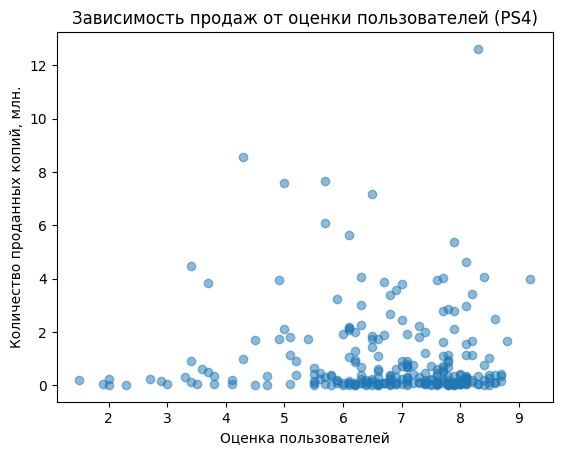

In [54]:
#построим диаграмму рассеяния и рассчитаем коэффициент корреляции между продажам и оценкой пользователей
plt.title('Зависимость продаж от оценки пользователей (PS4)')
plt.xlabel('Оценка пользователей')
plt.ylabel('Количество проданных копий, млн.')
plt.scatter (df_new.query('platform == "PS4"')['user_score'],
             df_new.query('platform == "PS4"')['total_sales'],
             alpha=0.5) 
print('Коэффициент корреляции между оценками пользователей и объемами продаж:', 
      df_new.query('platform == "PS4"')['user_score'].corr(df_new.query('platform == "PS4"')['total_sales']))

Зависимость объемов продаж от оценки пользователей не прослеживается. Вероятно, это связано с тем, что оценка критиков присваивается играм еще до официального релиза, а их рецензии являются более мощным инструментом маркетингового продвижения продукта. В то время как пользовательские оценки выставляются уже после релиза игры; они более субъективны и неоднозначны.

Посмотрим, актуальны ли выведенные закономерности для других платформ.

Коэффициент корреляции между оценками критиков и объемами продаж: 0.28


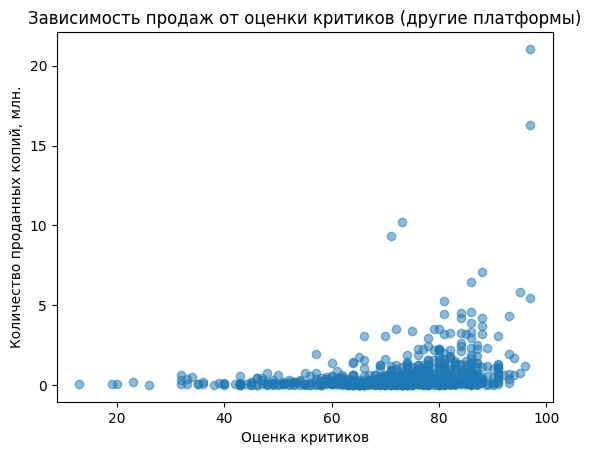

In [55]:
#построим диаграмму рассеяния и рассчитаем коэффициент корреляции между продажам и оценкой критиков
plt.title('Зависимость продаж от оценки критиков (другие платформы)')
plt.xlabel('Оценка критиков')
plt.ylabel('Количество проданных копий, млн.')
plt.scatter (df_new.query('platform != "PS4"')['critic_score'],
             df_new.query('platform != "PS4"')['total_sales'],
             alpha=0.5) 
print('Коэффициент корреляции между оценками критиков и объемами продаж:', 
      round(df_new.query('platform != "PS4"')['critic_score'].corr(df_new.query('platform != "PS4"')['total_sales']),2))

Взаимосвязь между оценками критиков и продажами игр для других платформ не так заметна, как в случае с PS4, но все же есть: игры с более выскоми показателями продаж, как правило, получают и высокие оценки от критиков.

Коэффициент корреляции между оценками пользователей и объемами продаж: -0.001


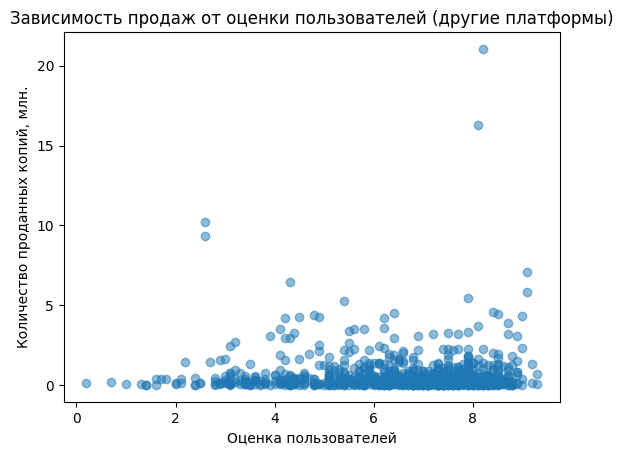

In [56]:
#построим диаграмму рассеяния и рассчитаем коэффициент корреляции между продажам и оценкой пользователей
plt.title('Зависимость продаж от оценки пользователей (другие платформы)')
plt.xlabel('Оценка пользователей')
plt.ylabel('Количество проданных копий, млн.')
plt.scatter (df_new.query('platform != "PS4"')['user_score'],
             df_new.query('platform != "PS4"')['total_sales'],
             alpha=0.5) 
print('Коэффициент корреляции между оценками пользователей и объемами продаж:', 
      round(df_new.query('platform != "PS4"')['user_score'].corr(df_new.query('platform != "PS4"')['total_sales']),3))

Взаимосвязь между оценками пользователей и продажами игр для других платформ также не наблюдается.

<a id="3.7 Распределение игр по жанрам"></a>
#### 3.7 Распределение игр по жанрам

Рассмотрим, как распределены количество выпускаемых игр и объемы продаж в зависимости от жанра.

In [57]:
pd.pivot_table(df_new, index='genre', 
               values='total_sales', aggfunc=['sum','median'])

,sum,median
,total_sales,total_sales
genre,,
Action,321.87,0.110
Adventure,23.64,0.030
Fighting,35.31,0.125
Misc,62.82,0.100
Platform,42.63,0.225
Puzzle,3.17,0.060
Racing,39.89,0.120
Role-Playing,145.89,0.125


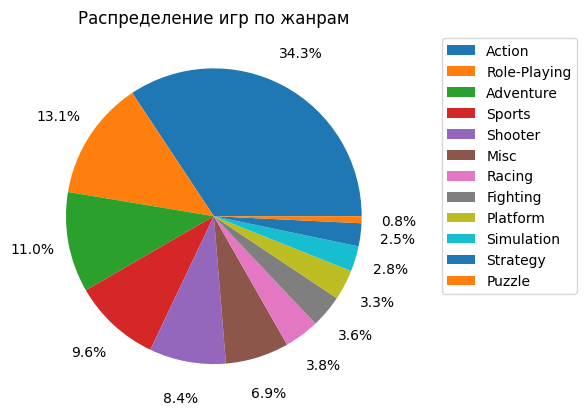

In [58]:
#построим диаграмму на основе распределения игр по жанрам
plt.title('Распределение игр по жанрам')
plt.pie(pd.pivot_table(df_new, 
                       index='genre', values='name', 
                       aggfunc='count').sort_values(by='name', ascending=False)['name'],
       autopct='%1.1f%%',
       pctdistance=1.25)
plt.legend(pd.pivot_table(df_new, 
                       index='genre', values='name', 
                       aggfunc='count').sort_values(by='name', ascending=False).index, loc='upper center', 
           bbox_to_anchor=(1.3, 1))

Видим, что наиболее поплуярный жанр игр, выпускаемых на разные платформы, - Action. На игры данного жанра приходится более трети всей выборки (34.3%).

На втором месте - Role-Playing, 13.1%

На третьем - Adventure (11%)

На каждый из остальных 9ти жанров приходится менее 10% игр, а самый "редкий" из них - Puzzle (0.8% игр из выборки).

Посмотрим, сохранится ли эта закономерность при распределении объемов продаж по жанрам.

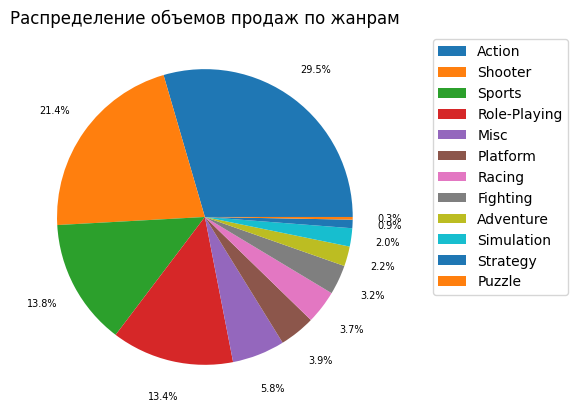

In [59]:
#построим диаграмму на основе распределения объемов продаж по жанрам
plt.title('Распределение объемов продаж по жанрам')
plt.pie(pd.pivot_table(df_new, 
                       index='genre', values='total_sales', 
                       aggfunc='sum').sort_values(by='total_sales', ascending=False)['total_sales'],
       autopct='%1.1f%%',
       pctdistance=1.25,
       textprops={'fontsize': 7})
plt.legend(pd.pivot_table(df_new, 
                       index='genre', values='total_sales', 
                       aggfunc='sum').sort_values(by='total_sales', ascending=False).index, loc='upper center', 
           bbox_to_anchor=(1.3, 1))

По объемам продаж лидируют следующие жанры:

1. Action - 29,5% от общего объема продаж
2. Shooter - 21.4%
3. Sports - 13.8%
4. Role-Playing - 13.4%

Наименее прибыльный жанр - Puzzle (0.3%)

Рассмотрим также распределение медианного значения объемов продаж по жанрам, а также построим диаграммы размаха продаж по жанрам.

<BarContainer object of 12 artists>

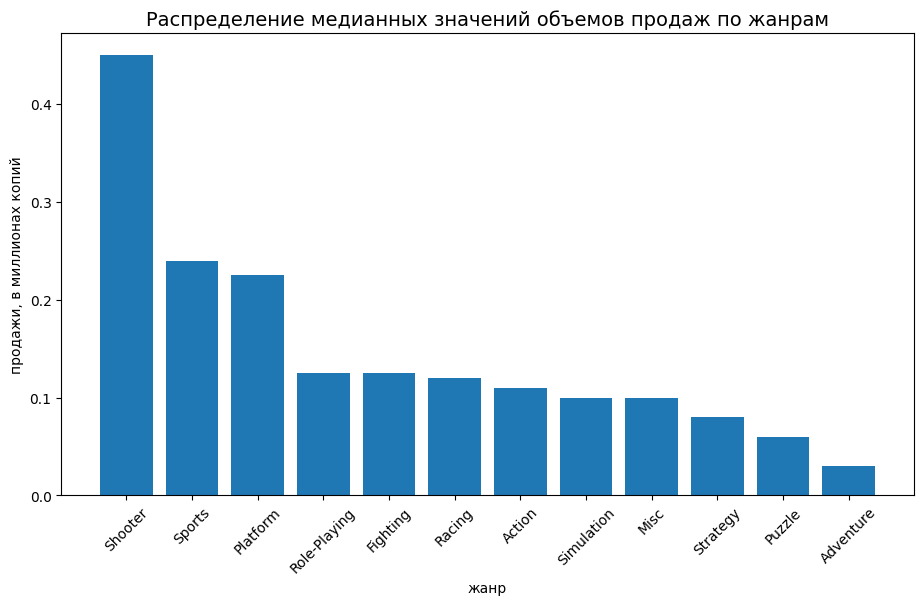

In [60]:
plt.figure(figsize=(11,6))
plt.title('Распределение медианных значений объемов продаж по жанрам',fontsize=14)
plt.xticks(rotation = 45)
plt.yticks(np.arange(0,5, 0.1))
plt.xlabel('жанр',fontsize=10)
plt.ylabel('продажи, в миллионах копий', fontsize=10)

plt.bar(pd.pivot_table(df_new, 
                       index='genre', values='total_sales', 
                       aggfunc='median').sort_values(by='total_sales', ascending=False).index,
        pd.pivot_table(df_new, 
                       index='genre', values='total_sales', 
                       aggfunc='median').sort_values(by='total_sales', ascending=False)['total_sales'])
        

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
count,402.000000,179.000000,47.000000,102.000000,37.000000,12.000000,36.000000,207.000000,76.000000,48.000000,75.000000,42.000000
mean,0.800672,0.132067,0.751277,0.615882,1.152162,0.264167,1.108056,0.704783,3.065526,0.453333,2.008667,0.240000
std,3.177224,0.367532,1.943517,2.528428,1.361252,0.369089,1.546433,1.820247,5.362747,1.004601,3.761598,0.395018
min,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.020000,0.010000
25%,0.030000,0.020000,0.055000,0.030000,0.190000,0.027500,0.097500,0.060000,0.140000,0.027500,0.170000,0.030000
50%,0.110000,0.030000,0.170000,0.090000,0.580000,0.090000,0.470000,0.160000,1.190000,0.050000,0.530000,0.085000
75%,0.410000,0.070000,0.520000,0.275000,1.730000,0.285000,1.552500,0.480000,3.550000,0.367500,1.470000,0.247500
max,56.580000,2.920000,12.420000,24.160000,6.000000,1.190000,7.090000,14.600000,27.390000,5.220000,17.370000,1.730000


<AxesSubplot:title={'center':'Диаграммы размаха объемов продаж по жанрам'}, xlabel='Количество проданных копий, млн', ylabel='Жанры'>

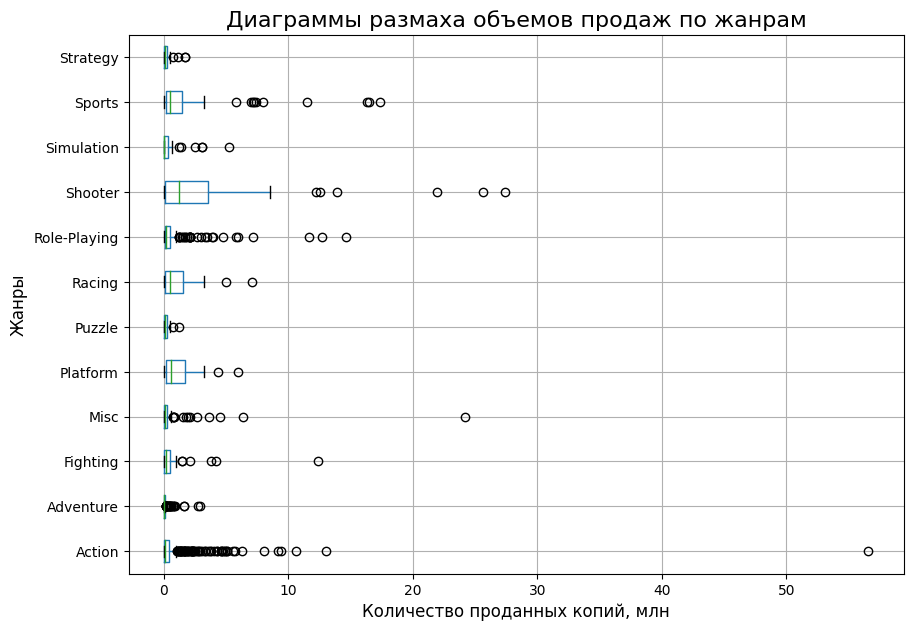

In [61]:
#построим диаграммы размаха 
display(pd.pivot_table(df_new, 
               index = 'name', columns='genre', values='total_sales', aggfunc='sum').describe())


plt.figure(figsize=(10,7))
plt.title('Диаграммы размаха объемов продаж по жанрам',fontsize=16)
plt.ylabel('Жанры',fontsize=12)
plt.xlabel('Количество проданных копий, млн', fontsize=12)
pd.pivot_table(df_new, 
               index = 'name', columns='genre', values='total_sales', aggfunc='sum').boxplot(vert=False)



<AxesSubplot:title={'center':'Диаграммы размаха объемов продаж по жанрам, до 10 млн. копий'}, xlabel='Количество проданных копий, млн', ylabel='Жанры'>

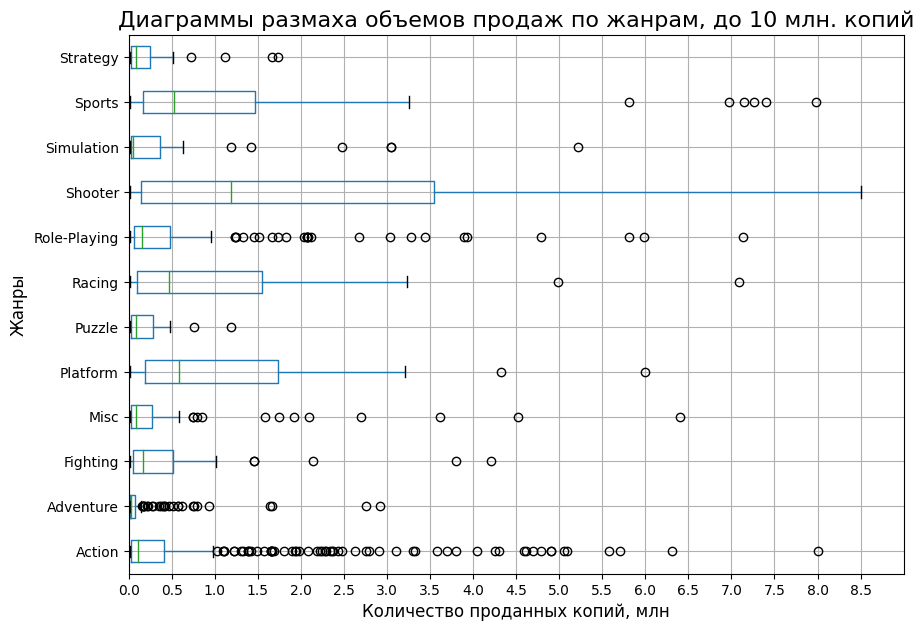

In [62]:
#построим диаграммы размаха на промежутке до 10 млн. копий 

plt.figure(figsize=(10,7))
plt.title('Диаграммы размаха объемов продаж по жанрам, до 10 млн. копий',fontsize=16)
plt.ylabel('Жанры',fontsize=12)

plt.xlim(0,9)
plt.xticks(np.arange(0,9,0.5))
plt.xlabel('Количество проданных копий, млн', fontsize=12)
pd.pivot_table(df_new, 
               index = 'name', columns='genre', values='total_sales', aggfunc='sum').boxplot(vert=False)


На общей диаграмме размаха, как и в случае с платформами, наблюдаем множество выбросов во всех жанрах. Для большинства жанров объемы продаж даже с учетом выбросов не превышают 10 млн. копий. Однако есть и абсолютные бестселлеры: самый успешный из них - в жанре Action, было продано свыше 55 млн. копий этой игры. 

Ограничив рассматриваемый промежуток объемов продаж до 10 млн. копий, видим, как распределены продажи по жанрам в границах статистически значимых значений. 

Большинство (75% или более) игр в жанрах Strategy, Simulation, Role-Playing, Puzzle, Misc, Fighting , Adventure и Action продаются в объемах, не превышающих 0.5 миллиона копий. Однако обратим внимание, что продажи игр жанров Role-Playing, Adventure и Action распределены менее предсказуемо, плотность выбросов среди игр этиж жанров довольно высока. Особенно это касается Action-игр: несмотря на то, что жанр далеко не является лидером по медианным значениям продаж, бОльшая часть игр-бестселлеров, включая самую успешную, относятся именно к этому жанру. 

Лидеры по продаваемости игр - жанры Shooter, Sports, Platform и Racing, среди них особенно выделяется первый. Шутеры отличаются самым высоким медианным значением, 1.2 млн. копий, а верхняя граница статистически значимы данных по продажам этого жанра - 8.5 млн. При этом у жанра не так много выбросов, то есть игры этого жанра достаточно "стабильны" в плане успешности. 

Таким образом, можем сделать вывод о том, что потенциально наиболее прибыльными жанрами являются Shooter и Sports: на них приходится значительная доля рынка, причем бОльшая часть игр этого жанра продаются значительно лучше остальных. 

На жанры Role-Playing  и  Action также стоит обратить внимание: игры в этих жанрах очень популярны, на эти два жанра приходится почти половина релизов и свыше 40% от общего объема продаж. Однако далеко не все игры этих жанров являются бестселлерами, вероятность того, что игры этих жанров принесут большую прибыль, меньше, чем в случае с жанрами Shooter и Sports. 

<a id="Шаг 4. Портрет пользователя по регионам"></a>
### Шаг 4. Портрет пользователя по регионам

Составим портрет пользователя для каждого из регионов(Северная Америка, Европа, Япония):

- определим топ-5 популярных платформ для каждого региона;
- определим топ-5 популярных жанров;
- проверим, влияет ли рейтинг ESRB на продажы в каждом регионе.


Определите для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишите различия в долях продаж.
Самые популярные жанры (топ-5). Поясните разницу.
Влияет ли рейтинг ESRB на продажи в отдельном регионе?

<a id="4.1 Рейтинг платформ по регионам"></a>
#### 4.1 Рейтинг платформ по регионам

Определим топ-5 самых популярных платформ в каждом регионе.

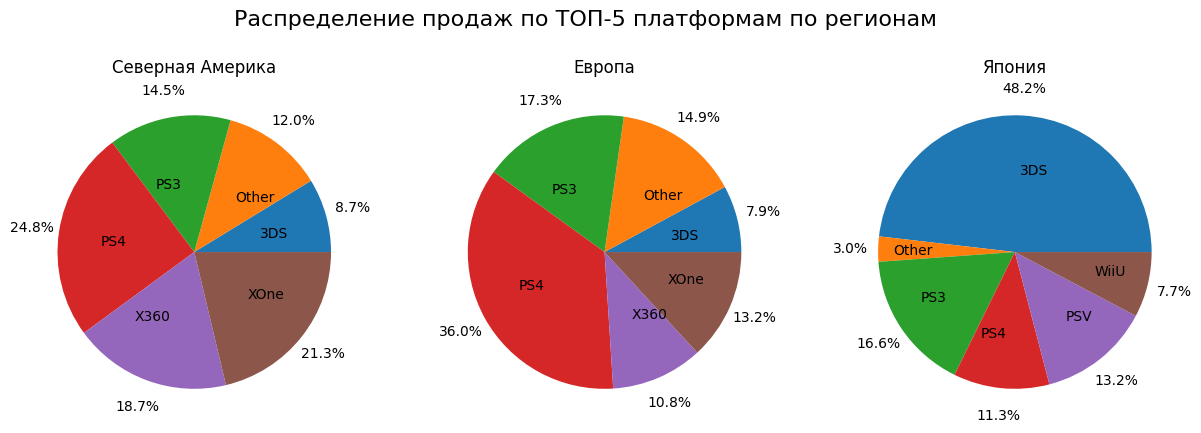

In [132]:
#для каждого региона создадим список топ-5 платформ:

top_platforms_na = pd.pivot_table(df_new, index='platform', 
                                       values='na_sales',aggfunc='sum').sort_values(by='na_sales',
                                                                      ascending=False).head(5).index
top_platforms_eu = pd.pivot_table(df_new, index='platform', 
                                       values='eu_sales',aggfunc='sum').sort_values(by='eu_sales',
                                                                      ascending=False).head(5).index
top_platforms_jp = pd.pivot_table(df_new, index='platform', 
                                       values='jp_sales',aggfunc='sum').sort_values(by='jp_sales',
                                                                      ascending=False).head(5).index

#создадим новые датафреймы для каждого региона, содержащие данные о платформах и объемах продаж; 
#платформы, не вошедшие в топ-5, обозначим как Other:


na_platform_rating = df_new[['platform','na_sales']].copy().groupby('platform').agg({'na_sales':'sum'})

na_platform_rating.index = na_platform_rating.index.where(na_platform_rating.index.isin(top_platforms_na),'Other')



eu_platform_rating = df_new[['platform','eu_sales']].copy().groupby('platform').agg({'eu_sales':'sum'})

eu_platform_rating.index = eu_platform_rating.index.where(eu_platform_rating.index.isin(top_platforms_eu),'Other')


    
jp_platform_rating = df_new[['platform','jp_sales']].copy().groupby('platform').agg({'jp_sales':'sum'})

jp_platform_rating.index = jp_platform_rating.index.where(jp_platform_rating.index.isin(top_platforms_jp),'Other')


#построим круговые диаграммы с распределением средних значений объемов продаж по платформам для каждого региона:

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))





ax1.pie(pd.pivot_table(na_platform_rating,index='platform', values='na_sales',aggfunc='sum')['na_sales'],
        labels= pd.pivot_table(na_platform_rating, index='platform', values='na_sales').index,
       autopct='%1.1f%%',
       labeldistance=0.5,
        pctdistance=1.2,
       textprops={'fontsize': 10})

ax1.set_title('Северная Америка')

ax2.pie(pd.pivot_table(eu_platform_rating, index='platform', values='eu_sales',aggfunc='sum')['eu_sales'],
        labels= pd.pivot_table(eu_platform_rating, index='platform', values='eu_sales').index,
       autopct='%1.1f%%',
       labeldistance=0.5,
        pctdistance=1.2,
       textprops={'fontsize': 10})

ax2.set_title('Европа')

ax3.pie(pd.pivot_table(jp_platform_rating, index='platform', values='jp_sales',aggfunc='sum')['jp_sales'],
        labels= pd.pivot_table(jp_platform_rating, index='platform', values='jp_sales').index,
       autopct='%1.1f%%',
       labeldistance=0.6,
        pctdistance=1.2,
       textprops={'fontsize': 10},
       normalize=True)

ax3.set_title('Япония')


fig.suptitle('Распределение продаж по ТОП-5 платформам по регионам', fontsize=16)

plt.show()


Рейтинги топ-5 платформ выглядят следующим образом:

Северная Америке:

1. PS4 - 24.8%
2. XOne - 21.3%
3. X360 - 18.7%
4. PS3 - 14.5%
5. 3DS - 8.7%

Европа:

1. PS4 - 36%
2. PS3 - 17.3%
3. XOne - 13.2%
4. X360 - 10.8% 
5. 3DS - 7.9%

Япония:

1. 3DS - 48.2%
2. PS3 - 16.6%
3. PSV - 13.2%
4. PS4 - 11.3% 
5. WiiU - 7.7%

У рынков Северной Америки и Европы рейтинги платформ схожи: в обоих регионах в топ-5 платформ вошли PS4, XOne, X360, PS3 и DS. При этом первое место в рейтинге в обоих регионах занимает PS4, последнее - 3DS.


Рынок Японии значительно отличается: платформа 3DS является абсолютным лидером рынка - 48.2% продаж приходятся на эту платформу. В японский рейтинг вошли платформы PSV и WiiU, непопулярные в Америке и Европе. XOne и X360 не вошли в рейтинг. 

В шаге 3.4 мы определили список потенциально прибыльных и актуальных платформ на 2017 г.: WiiU, XOne, 3DS, PS4 и PC.

Распределение продаж по платформам по регионам, в целом, подтверждает этот вывод. Однако стоит отметить, что:

- показатели продаж игр для XOne и PS4 были сформированы в основном благодаря американскому и европейскому рынку, в то время как в Японии эти платформы непопулярны;
    
- WiiU популярна лишь в  Японии, для европейских стран и Северной Америки эта платформа не входит в топ-5;

- 3DS - самая популярная платформа в Японии (1е место, 44.5% продаж), но в других регионах она почти не представлена;

Персональные компьютеры, ожидаемо, не вошли в топ-5 ни одного региона.

Таким образом, при выборе платформ, на которые будет ориентироваться маркетинговый план компании, необходимо учитывать региональные особенности целевой аудитории.

In [133]:
jp_platform_rating

,jp_sales
platform,
3DS,67.81
Other,0.00
Other,0.00
PS3,23.35
PS4,15.96
Other,3.29
PSV,18.59
Other,0.05
WiiU,10.88


<a id="4.2 Рейтинг жанров по регионам"></a>
#### 4.2 Рейтинг жанров по регионам

Определим топ-5 самых популярных жанров в каждом регионе.

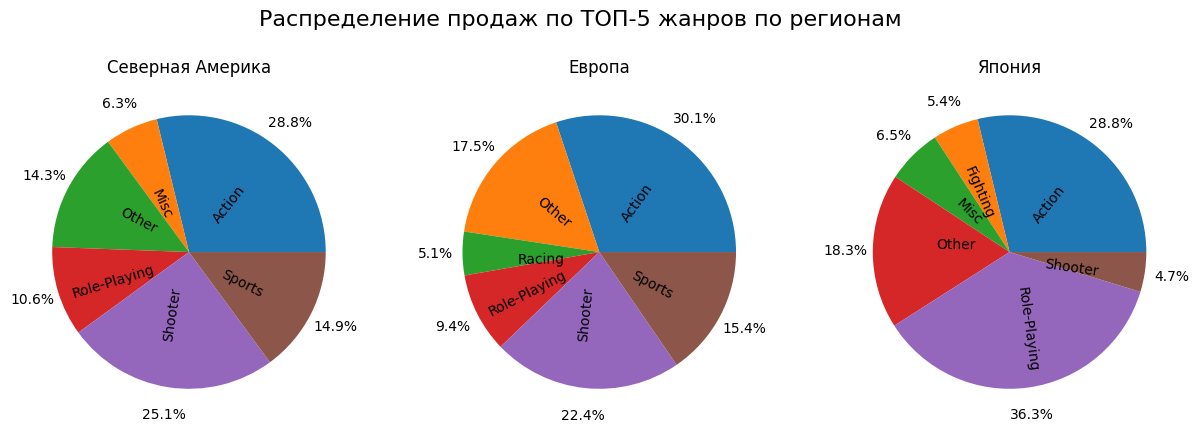

In [140]:
#для каждого региона создадим список топ-5 жанров:

top_genre_na = pd.pivot_table(df_new, index='genre', 
                                       values='na_sales',aggfunc='sum').sort_values(by='na_sales',
                                                                      ascending=False).head(5).index
top_genre_eu = pd.pivot_table(df_new, index='genre', 
                                       values='eu_sales',aggfunc='sum').sort_values(by='eu_sales',
                                                                      ascending=False).head(5).index
top_genre_jp = pd.pivot_table(df_new, index='genre', 
                                       values='jp_sales',aggfunc='sum').sort_values(by='jp_sales',
                                                                      ascending=False).head(5).index

#создадим новые датафреймы для каждого региона, содержащие данные о жанрах и объемах продаж; 
#жанры, не вошедшие в топ-5, обозначим как Other:

na_genre_rating = df_new[['genre','na_sales']].copy().groupby('genre').agg({'na_sales':'sum'})

na_genre_rating.index = na_genre_rating.index.where(na_genre_rating.index.isin(top_genre_na),'Other')



eu_genre_rating = df_new[['genre','eu_sales']].copy().groupby('genre').agg({'eu_sales':'sum'})

eu_genre_rating.index = eu_genre_rating.index.where(eu_genre_rating.index.isin(top_genre_eu),'Other')


    
jp_genre_rating = df_new[['genre','jp_sales']].copy().groupby('genre').agg({'jp_sales':'sum'})

jp_genre_rating.index = jp_genre_rating.index.where(jp_genre_rating.index.isin(top_genre_jp),'Other')



#построим круговые диаграммы с распределением средних значений объемов продаж по жанрам для каждого региона:

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))





ax1.pie(pd.pivot_table(na_genre_rating, index='genre', values='na_sales',aggfunc='sum')['na_sales'],
        labels= pd.pivot_table(na_genre_rating, index='genre', values='na_sales').index,
       autopct='%1.1f%%',
       labeldistance=0.25,
        rotatelabels=True,
        pctdistance=1.2,
       textprops={'fontsize': 10})

ax1.set_title('Северная Америка')

ax2.pie(pd.pivot_table(eu_genre_rating, index='genre', values='eu_sales',aggfunc='sum')['eu_sales'],
        labels= pd.pivot_table(eu_genre_rating, index='genre', values='eu_sales').index,
       autopct='%1.1f%%',
       labeldistance=0.25,
        rotatelabels=True,
        pctdistance=1.2,
       textprops={'fontsize': 10})

ax2.set_title('Европа')

ax3.pie(pd.pivot_table(jp_genre_rating, index='genre', values='jp_sales',aggfunc='sum')['jp_sales'],
        labels= pd.pivot_table(jp_genre_rating, index='genre', values='jp_sales').index,
       autopct='%1.1f%%',
       labeldistance=0.25,
        rotatelabels=True,
        pctdistance=1.2,
       textprops={'fontsize': 10},
       normalize=True)

ax3.set_title('Япония')


fig.suptitle('Распределение продаж по ТОП-5 жанров по регионам', fontsize=16)

plt.show()

Рейтинги топ-5 самых популярных жанров по регионам выглядят следующим образом:

Северная Америка: 
1. Action - 28.8%, 
2. Shooter - 25.1%, 
3. Sports - 14.9%, 
4. Role-Playing - 10.6%, 
5. Misc - 10.8%


Европа: 

1. Action - 30.1%, 
2. Shooter - 22.4%, 
3. Sports - 15.4%, 
4. Role-Playing - 9.4%, 
5. Racing - 5.1%


Япония: 

1. Role-Playing - 36.3%, 
2. Action - 28.8%, 
3. Misc - 6.5%, 
4. Fighting - 5.4%, 
5. Shooter - 4.7%.


Жанр Action вошел во все три рейтинга, причем в СА и Европе этот жанр лидирует, в Японии - находится на втором месте.

Shooter также вошел во все три рейтинга, в Европе и Америке на него приходится 2-я по размеру долю рынка.

Жанр Sports - третий по популярности в странах Северной Америки и Европы, но в Японии он не популярен.

Role-Playing - значимый жанр во всех трех регионах, однако в Европе и Америке он не так популярен, как в Японии, где игры этого жанра занимают лидирующие позиции по продажам.

Жанр Misc вошел в рейтинги Америки и Японии, но не вошел в европйеский.

Гонки (Racing) популярны только в Европе, а игры жанра Fighting - только в Японии.


Таким образом, в целом подтвердился наш вывод из шага 3.7. Жанры Shooter, Action и Role-Playing вошли во все три топ-5. Игры жанра Sports также довольно популярны, но только в Америке и Европе. 


<a id="4.3 Влияние рейтинга ESRB на продажи"></a>
#### 4.3 Влияние рейтинга ESRB на продажи

Изучим влияние рейтинга ESRB на продажи игр в каждом из трех регионов.

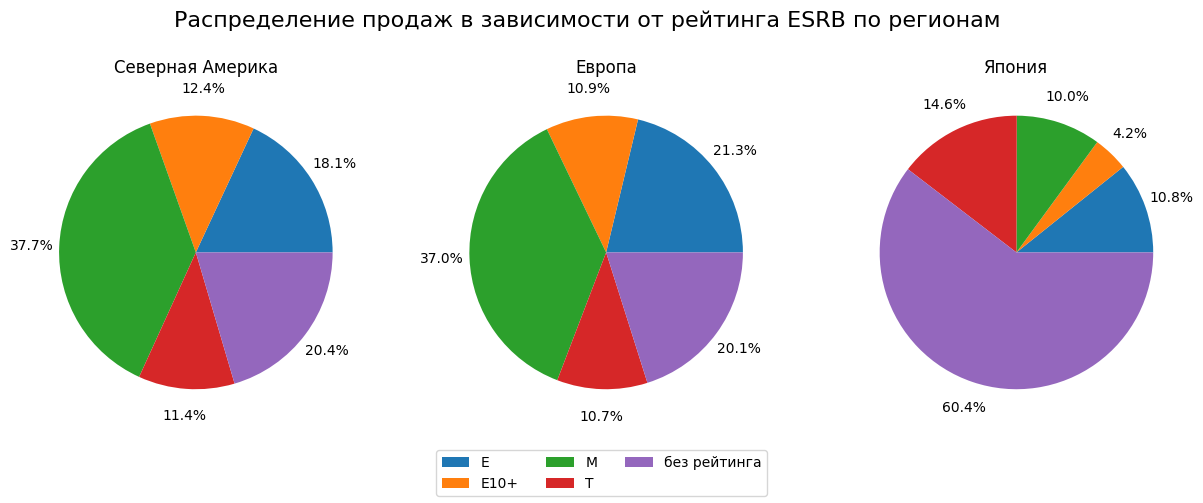

In [141]:


#построим круговые диаграммы с распределением средних значений объемов продаж в зависимости от рейтинга для каждого региона:

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))



ax1.pie(pd.pivot_table(df_new, index='rating', values='na_sales',aggfunc='sum')['na_sales'],
       autopct='%1.1f%%',
        pctdistance=1.2,
       textprops={'fontsize': 10})

ax1.set_title('Северная Америка')

ax2.pie(pd.pivot_table(df_new, index='rating', values='eu_sales',aggfunc='sum')['eu_sales'],
       autopct='%1.1f%%',
        pctdistance=1.2,
       textprops={'fontsize': 10},
       normalize=True)

ax2.set_title('Европа')

ax3.pie(pd.pivot_table(df_new, index='rating', values='jp_sales',aggfunc='sum')['jp_sales'],
       autopct='%1.1f%%',
        pctdistance=1.2,
       textprops={'fontsize': 10},
       normalize=True)

ax3.set_title('Япония')


fig.legend(pd.pivot_table(df_new, 
                       index='rating', values='total_sales',aggfunc='sum').index, loc='lower center', ncol=3,fontsize=10)

fig.suptitle('Распределение продаж в зависимости от рейтинга ESRB по регионам', fontsize=16)

plt.show()

Напомним, что буквенные обозначения рейтинга имеют расшифровываются следующим образом:

- E - без возрастных ограничений
- M - для лиц в возрасте 17 лет и старше
- T - для лиц в возрасте 13 лет и старше
- E10+ - для лиц в возрасте 10 лет и старше

Видим, что распределения средних значений продаж в зависимости от рейтинга игры в Северйной Америке и Европе схожи: наиболее популярны игры, ориентированные на взрослую аудиторию 17+ (37.7% в Америке и 37% в Европе). На втором месте - игры без рейтинга (20.4% / 20.1%). На третьем -  игры без возрастных ограничений (18.1% и 21.3%). Четвертое место у детских игр 10+ (12.4%/ 10.9%), а наименее популярны подростковые игры 13+ (11.4% / 10.7%)

В Японии распределение выглядит иначе: подавляющая доля (60.4%) приходится на игры, которым возрастной рейтинг не был присвоен. Это связано, вероятно, с закономерностью, которую мы наблюдали выше: предпочтения японской аудитории довольно сильно отличаются от двух других регионов, и, вероятно, многим играм, популярным в Японии, организация ESRB не присваивает рейтинг в связи с их непопулярностью в Америке и Европе. 

В остальном объемы продаж в Японии распределены следующим образом: наиболее популярны игры для подростков с рейтингом 13+ (14.6%) и игры для всех возрастов (10.8%), на игры для взрослых с рейтингом 17+ приходится 10% продаж, а на детские игры 10+ - лишь 4.2%. 



Таким образом, основаная целевая аудитория в Америке и Европе - взрослые старше 17 лет. Это объясняется и выявленными ранее жанровыми предпочтениями жителей этих регионов: так, игры популярного в обоих случаях жанра Shooter явно ориентированы на взрослых игроков со сформированной психикой. 

Подростковые игры более популярны в Японии, чем в Америке и Европе. Однако делать какие-либо выводы об особенностях японской аудитории на основании возрастного рейтинга продаваемых в стране игр сложнее, т.к. слишком большая доля продаж приходится на игры, которым этот рейтинг не присвоен.

<a id="Шаг 5. Проверка гипотез"></a>
### Шаг 5. Проверка гипотез

Одна из целей нашего исследования - проверка следующих гипотез:

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action и Sports разные.

<a id="5.1 Сравнение пользовательских рейтингов платформ Xbox One и PC"></a>
#### 5.1 Сравнение пользовательских рейтингов платформ Xbox One и PC

Проверим гипотезу о том, что пользовательские рейтинги игр для платформ Xbox One (XOne) и PC совпадают.

Сформулируем нулевую и альтернативную гипотезы:

H0: Пользовательский рейтинг (user_score) игр для платформы Xbox One (XOne) равен пользовательскому рейтингу игр для платформы PC.

H1: Пользовательский рейтинг (user_score) игр для платформы Xbox One (XOne) не равен пользовательскому рейтингу игр для платформы PC.

Проведем t-тест для проверки гипотезы.

In [145]:
print('Средний пользовательский рейтинг игр на Xbox One:', np.ceil(df_new.query('platform == "XOne"')['user_score'].mean()))

print('Средний пользовательский рейтинг игр на PC:', np.ceil(df_new.query('platform == "PC"')['user_score'].mean()))


alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(df_new.query('platform == "XOne"& ~user_score.isna()')['user_score'], 
                       df_new.query('platform == "PC" & ~user_score.isna()')['user_score'])

print('p-значение:', round(results.pvalue, 2))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

Средний пользовательский рейтинг игр на Xbox One: 7.0
Средний пользовательский рейтинг игр на PC: 7.0
p-значение: 0.14
Не получилось отвергнуть нулевую гипотезу


Результат теста не противоречит нулевой гипотезе. Нет достаточных оснований, чтобы говорить о том, что пользовательские рейтинги двух платформ отличаются. 

Вероятность  получить отличные друг от друга средние значения двух выборок случайно слишком высока (14% вероятность случайности), чтобы считать такой результат достаточным для того, чтобы отвергнуть нулевую гипотезу.


Об этом свидетельсвтует и равенство рассчитанных средних значений.

<a id="5.2 Сравнение пользовательских рейтингов жанров Action и Sports"></a>
#### 5.2 Сравнение пользовательских рейтингов жанров Action и Sports

Проверим гипотезу о том, что пользовательские рейтинги игр жанров Action и Sports отличаются.

Сформулируем нулевую и альтернативную гипотезы:

H0: Пользовательский рейтинг (user_score) игр жанра Action равен пользовательскому рейтингу игр жанра Sports.

H1: Пользовательский рейтинг (user_score) игр жанра Action не равен пользовательскому рейтингу игр жанра Sports.

Проведем t-тест для проверки гипотезы.


In [157]:
print('Средний пользовательский рейтинг игр в жанре Action:', np.ceil(df_new.query('genre == "Action"')['user_score'].mean()))

print('Средний пользовательский рейтинг в жанре Sports:', np.ceil(df_new.query('genre == "Sports"')['user_score'].mean()))


alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(df_new.query('genre == "Action"& ~user_score.isna()')['user_score'], 
                       df_new.query('genre == "Sports" & ~user_score.isna()')['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

Средний пользовательский рейтинг игр в жанре Action: 7.0
Средний пользовательский рейтинг в жанре Sports: 6.0
p-значение: 0.0
Отвергаем нулевую гипотезу


Результат теста противоречит нулевой гипотезе. Маловероятно, что несовпадение средних значений двух выборок случайно.

Это значит, что пользовательские рейтинги игр в жанрах Action и Sports, действительно, могут отличаться. 

<a id="Общий вывод"></a>
### Общий вывод

Мы изучили исторические данные о продажах игр онлайн-магазина "Стримчик", а также об оценках пользователей и экспертов, жанрах и платформах, на которых эти игры доступны. 

В рамках этапа предобработки данных мы подготовили данные к анализу: заменили наименования столбцов исходного датасета; избавились от пропущенных значений там, где это было возможно, или заменили их; привели данные к более подходящим форматам; избавились от неявных дубликатов; рассчитали дополнительный показатель - общую сумму продаж по всем регионам, который использовали в дальнейшем.

В рамках исследовательского анализа данных предприняли следующие шаги:

Проведем исследовательский анализ данных:

- изучили распределение игр по годам выпуска;
- изучили распределение продаж по годам для платформ с наибольшими суммарными продажами; 
- определили актуальный период, на данные которого будем опираться в дальнейшем; 
- определили потенциально прибыльные платформы; 
- изучили распределение глобальных продаж в разбивке по платформам;
- исследовали влияние отзывов критиков и пользователей на продажи игр на разных платформах;
- изучили распределение игр по жанрам, определили жанры с высокими и низкими продажами.

На основе результатов исследовательского анализа сделали следующие выводы:

- в промежутке с 1980 по 2016 гг. можно выделить несколько периодов, отличающихся количеством и динамикой появления новых релизов:
  - 1980 - 1993 гг. - практически нет новых релизов;
  - 1993 - 1998 гг. - количество новых релизов ежегодно растет;
  - 1998 - 2000 гг. - небольшой спад в количестве релизов;
  - 2000 - 2002 гг. - резкий подъем, количество релизов ежегодно стремительно растет;
  - 2002 - 2004 гг. - небольшой спад;
  - 2004 - 2009 гг. - стабильный рост, количество новых игр увеличивается до максимальной отметки - свыше 1400;
  - 2009 - 2013 гг. - количество релизов постепенно снижается;
  - 2013 по 2016 гг. - снова наблиюдаем рост вплоть до 2016. В 2016 график показывает спад, однако данные за этот год представлены не полностью, поэтому делать однозначный вывод об отрицательной динамике нельзя.
  
- объемы продаж шести платформ (PS2, X360, PS3, Wii, DS, PS) значительно отличаются в бОльшую сторону от показателей остальных платформ;
- игровые платформы актуальны в среднем на протяжении 10 лет, а пиковых значений объемы продаж игр для разных платформ достигают примерно через 4-5 лет после их появления;
- актуальным для составления прогноза на 2017 г. можно считать период 2013-2016 гг.;
- можно предположить, что в 2017 г. свою актуальность сохранят платформы WiiU, XOne, 3DS, PS4 и PC. Особое внимание стоит обратить на платформы PS4 и XOne, которые, помимо бОльших объемов продаж в последние годы по сравнению с другими платформами, имеют потенциал к росту этих объемов и в 2017 г;
- объемы продаж для большинства игр (75%) не превышают 1 млн. копий. Однако игр с показателями, значительно превышающими этот порог, довольно много для каждой из платформ - вероятно, это игры-бестселлеры. Больше всего суперпопулярных игр выпускается для PS4 и PS3;
- продажи не зависят от оценки критиков напрямую; однако можно утверждать, что чем выше оценка критиков, тем больше вероятность того, что игра будет успешна на рынке;
- зависимость объемов продаж от оценки пользователей не прослеживается;
- потенциально наиболее прибыльными жанрами являются Shooter и Sports: на них приходится значительная доля рынка, причем бОльшая часть игр этого жанра продаются значительно лучше остальных;
- на жанры Role-Playing  и  Action также стоит обратить внимание: игры в этих жанрах очень популярны, на эти два жанра приходится почти половина релизов и свыше 40% от общего объема продаж. Однако далеко не все игры этих жанров являются бестселлерами, вероятность того, что игры этих жанров принесут большую прибыль, меньше, чем в случае с жанрами Shooter и Sports;

Мы составили портрет пользователя по трем регионам: Северная Америка, Европа, Япония. Получили следующие выводы:

- у рынков Северной Америки и Европы рейтинги платформ схожи: в обоих регионах в топ-5 платформ вошли PS4, XOne, X360, PS3 и DS. При этом первое место в рейтинге в обоих регионах занимает PS4, последнее - 3DS;
- рынок Японии значительно отличается: платформа 3DS является абсолютным лидером рынка - 48.2% продаж приходятся на эту платформу. В японский рейтинг вошли платформы PSV и WiiU, непопулярные в Америке и Европе. XOne и X360 не вошли в рейтинг;
- показатели продаж игр для XOne и PS4 были сформированы в основном благодаря американскому и европейскому рынку, в то время как в Японии эти платформы непопулярны; 
- WiiU популярна лишь в  Японии, для европейских стран и Северной Америки эта платформа не входит в топ-5;
- жанры Shooter, Action и Role-Playing вошли во все три топ-5. Игры жанра Sports также довольно популярны, но только в Америке и Европе;
- основаная целевая аудитория в Америке и Европе - взрослые старше 17 лет;
- подростковые игры более популярны в Японии, чем в Америке и Европе. Однако делать какие-либо выводы об особенностях японской аудитории на основании возрастного рейтинга продаваемых в стране игр сложнее, т.к. слишком большая доля продаж приходится на игры, которым этот рейтинг не присвоен;

На этапе проверки гипотез получили следующие результаты:

- маловероятно, что пользовательские рейтинги платформ XBox One и PC отличаются;
- есть основания предполагать, что пользовательские рейтинги игр в жанрах Action и Sports отличаются.

